# Connect to MySQL database

In [1]:
import mysql.connector

# Connect to MySQL database (placeholder credentials)
conn = mysql.connector.connect(
    host="y06qcehxdtkegbeb.cbetxkdyhwsb.us-east-1.rds.amazonaws.com",
    user="bsfsesnjo6jauxfe",
    password="imrz1au58gm1jen3",
    database="p13pq2xle73p2vtp",
    use_pure=True
)

cursor = conn.cursor()


In [2]:
cursor.execute("SHOW TABLES;")
print(cursor.fetchall())


#1) Count of players whose first name is Robert (using the "players" table):
cursor.execute("""
SELECT COUNT(*) AS num_roberts 
FROM players 
WHERE first_name = 'Robert';
""")

# Fetch and print results
result = cursor.fetchone()
print(f"Number of players named Robert: {result[0]}")


#2) Average minutes played per player in All-Star games (for players with multiple appearances):
cursor.execute("""
SELECT player_id, AVG(min) AS avg_minutes
FROM season_totals_allstar 
GROUP BY player_id
HAVING COUNT(*) > 1;
""")

# Fetch and print results
results = cursor.fetchall()
print("\nAverage minutes per player in multiple All-Star games:")
for player_id, avg_minutes in results:
    print(f"Player ID: {player_id}, Average Minutes: {avg_minutes:.2f}")



#3) Full names of players who did not make an All-Star game, 
# ordered by career minutes:
cursor.execute("""
SELECT CONCAT(p.first_name, ' ', p.last_name) AS full_name, crt.min AS career_minutes
FROM players p
JOIN career_totals_regular_season crt ON p.id = crt.player_id
LEFT JOIN season_totals_allstar sa ON p.id = sa.player_id
WHERE sa.player_id IS NULL
ORDER BY crt.min;

""")

# Fetch and print results
results = cursor.fetchall()
print("\nPlayers who never made an All-Star game (ordered by career minutes):")
for full_name, career_minutes in results:
    print(f"Player: {full_name}, Career Minutes: {career_minutes}")


[('career_totals_allstar',), ('career_totals_post_season',), ('career_totals_regular_season',), ('draft_history',), ('mvp_voting',), ('per36_career_post_season',), ('per36_career_regular_season',), ('per36_post_season',), ('per36_regular_season',), ('per_game_career_post_season',), ('per_game_career_regular_season',), ('per_game_post_season',), ('per_game_regular_season',), ('players',), ('rankings_post_season',), ('rankings_regular_season',), ('season_totals_allstar',), ('season_totals_post_season',), ('season_totals_regular_season',), ('teams',)]
Number of players named Robert: 21

Average minutes per player in multiple All-Star games:
Player ID: 17, Average Minutes: 18.44
Player ID: 23, Average Minutes: 18.00
Player ID: 56, Average Minutes: 21.67
Player ID: 84, Average Minutes: 19.25
Player ID: 87, Average Minutes: 17.50
Player ID: 96, Average Minutes: 17.00
Player ID: 105, Average Minutes: 19.33
Player ID: 117, Average Minutes: 12.50
Player ID: 121, Average Minutes: 21.11
Player ID

# Question 4: I choose e. Mary, 2 because it's a user2 (2 or 3) with sex = f making it mary and the count(*) is 1 because there's only one of her name but 2 of her user2 


Final Deliverable Components

Your final deliverable should include the following:

    Reproducible Code:
        Model Code: Provide all code used to create the final model. This should include:
            Data loading and integration routines.
            Feature engineering steps.
            Model training and hyperparameter tuning (e.g., using Bayesian optimization).
            Code for generating predictions (both in-sample and out-of-sample).
        Data Visualization: Include code for creating any visualizations (e.g., SHAP summary plots, prediction breakdowns, performance charts) that help explain model behavior and results.
        Instructions: Ensure that the code is well-commented so that another data scientist can run it and reproduce your results.

    Supplemental Data:
        CSV Files: Include any supplemental data files that were used (or generated) during the project. For instance, you might output the aggregated team or player stats as a CSV to accompany your code.
        Documentation of Data Sources: List and briefly describe the data sources so that reviewers know where the data came from.

    1–2 Page Summary Document:
        Approach: Describe how you approached the problem. Explain your data integration and preprocessing steps, your feature engineering choices, and the rationale behind selecting your modeling technique.
        Decisions Made: Document key decisions (e.g., why you used a particular model or why you selected certain features) and any trade-offs you considered.
        Model Overview: Provide an overview of the final model (or ensemble of models), including performance metrics, interpretation of feature importances (via SHAP or similar), and any challenges you encountered.
        Projection Discussion: Explain how you handled the absence of next season’s data (e.g., using the latest season as a proxy, extrapolating trends, or scenario analysis) and how that feeds into your MVP prediction.

    Out-of-Sample Projection for 2024 WNBA MVP:
        Projection Process: Describe and show the out-of-sample prediction step using the most recent season’s data to forecast the 2024 season.
        Prediction Results: Present a summary table or visualization that ranks players based on the predicted performance metric (e.g., predicted PIE), clearly identifying the top candidate for MVP.
        Discussion: Briefly discuss the results, any uncertainties in the projection, and potential areas for further improvement.

Part 2: PIE regression forecasting


C:\Users\ghadf\AppData\Local\Temp\ipykernel_42720\290922491.py:142: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ghadf\AppData\Local\Temp\ipykernel_42720\290922491.py:145: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Train data================       player_id     team_id  nba_season  pts  fgm  ftm  fga  fta  drb  orb  \
0        100445  1611661320        2016   30   12    6   22    8   19    4   
1        100634  1611661317        2016  312  102   68  209   75   84   10   
2        100646  1611661325        2016  433  146  106  337  123  123   40   
3        100720  1611661328        2016  436  160   44  356   56   91    6   
4        100720  1611661328        2017  317  117   24  274   31   53    7   
...         ...         ...         ...  ...  ...  ...  ...  ...  ...  ...   
1474    1641675  1611661328        2023  134   56   22  107   40   91   58   
1476    1641687  1611661325        2023   19    6    6   18    7    8    2   
1478    1641690  1611661317        2023   59   23   10   62   16   45   17   
1480    1641700  1611661317        2023   23    8    7   14    8    5    8   
1482    1641700  1611661323        2023    4    2    0    5    0    1    1   

      ...  min_per_game    fg_pct   

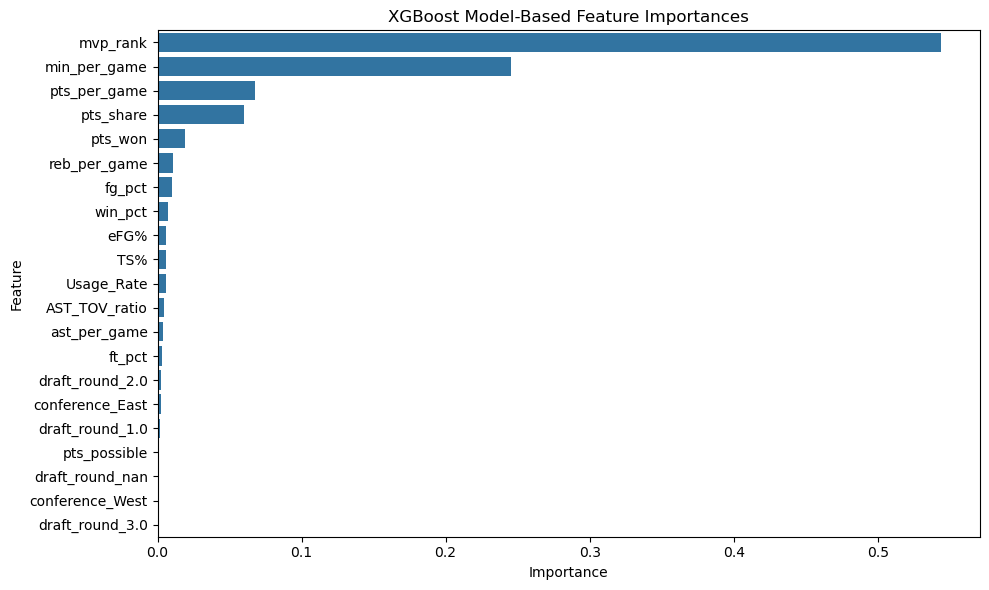


Permutation Importances (all features):
            feature  importance_mean  importance_std
3      min_per_game     1.084486e-05    1.642156e-06
0      pts_per_game     2.599813e-06    5.656317e-07
2      reb_per_game     1.991471e-06    5.653986e-07
14         mvp_rank     1.907588e-06    3.646974e-07
6           win_pct     4.082686e-07    2.410387e-07
11        pts_share     2.325576e-07    1.277148e-07
13          pts_won     2.157613e-07    3.176096e-08
4            fg_pct     8.586963e-08    3.290242e-07
7               TS%     5.820487e-08    1.386803e-07
17  draft_round_1.0     1.315392e-08    1.052842e-08
19  draft_round_3.0     0.000000e+00    0.000000e+00
16  conference_West     0.000000e+00    0.000000e+00
20  draft_round_nan    -6.743166e-10    4.763722e-10
18  draft_round_2.0    -1.206417e-08    8.206021e-09
15  conference_East    -1.412887e-08    1.118023e-08
12     pts_possible    -2.251937e-08    1.279233e-08
8              eFG%    -5.244638e-08    6.252181e-08
5    

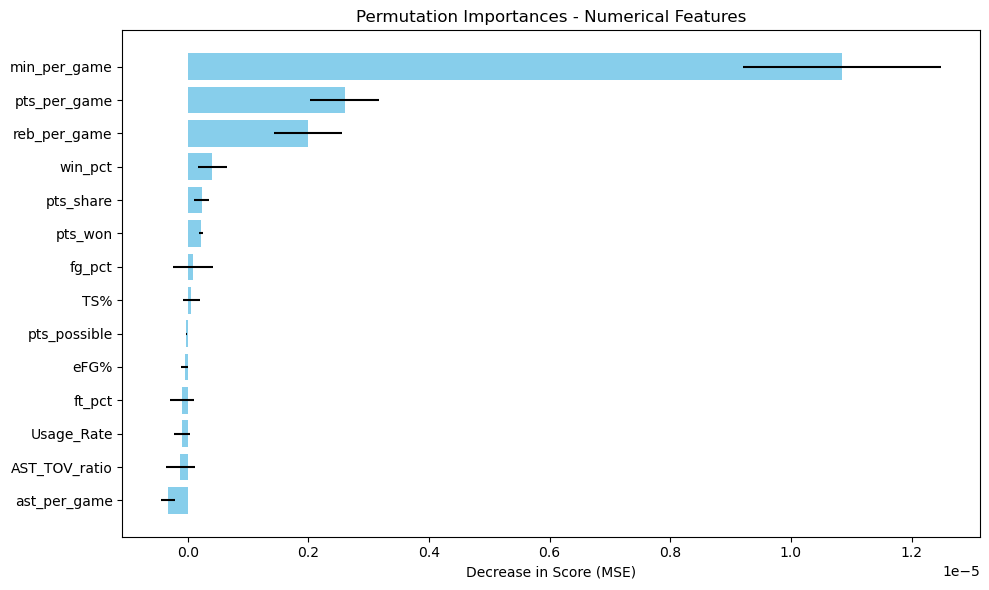

In [16]:
import pandas as pd
import numpy as np
import os

# For modeling and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder


#--------------------------------
# HELPER FUNCTIONS
#--------------------------------

def load_explore_group_data():
    """
    Load, explore, and prepare datasets for PIE regression forecasting.
    
    This function performs the following steps:
      - Loads CSV files for player stats, on–court/off–court stats, team records,
        MVP voting, and player info.
      - Standardizes column names.
      - Aggregates player stats by player, team, and season.
      - Merges the aggregated stats with player info, team records, and on–/off–court stats.
      - Computes the PIE metric (as each player's share of a season’s total PIE_numer).
      - Merges in MVP voting data.
      - Defines target_PIE (current season PIE) and computes additional per–game and advanced metrics.
      - Performs mean imputation on weight and height_inches.
      - Applies binning functions to height and weight.
      - Converts percentage columns (e.g. pts_share) from strings to numeric values.
    
    Returns:
        master (DataFrame): The fully processed and prepared dataset.
    """
    import pandas as pd
    import numpy as np

    # --------------------------
    # Load datasets
    # --------------------------
    player_stats = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/player_stats.csv')
    team_on = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/team_player_on_court.csv')
    team_off = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/team_player_off_court.csv')
    team_records = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/team_records.csv')
    mvp_voting = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/mvp_voting.csv')
    player_info = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/player_info.csv')

    # --------------------------
    # Standardize column names
    # --------------------------
    player_stats.rename(columns={'nba_person_id': 'player_id', 'nba_team_id': 'team_id'}, inplace=True)
    team_on.rename(columns={'nba_person_id': 'player_id', 'nba_team_id': 'team_id'}, inplace=True)
    team_off.rename(columns={'nba_person_id': 'player_id', 'nba_team_id': 'team_id'}, inplace=True)
    mvp_voting.rename(columns={'nba_person_id': 'player_id'}, inplace=True)
    player_info.rename(columns={'nba_person_id': 'player_id', 'display_name': 'player_name'}, inplace=True)

    # --------------------------
    # Aggregate player_stats by player, team, and season
    # --------------------------
    agg_cols = ['pts', 'fgm', 'ftm', 'fga', 'fta', 'drb', 'orb',
                'ast', 'stl', 'blk', 'pf', 'tov', 'gp', 'mp', 'fgm3', 'fga3']
    player_stats_agg = player_stats.groupby(['player_id', 'team_id', 'nba_season'])[agg_cols].sum().reset_index()
    player_stats_agg.rename(columns={'gp': 'player_gp', 'mp': 'player_mp'}, inplace=True)

    # --------------------------
    # Merge with player_info
    # --------------------------
    master = pd.merge(player_stats_agg, player_info, on='player_id', how='left')

    # --------------------------
    # Merge team records (on team_id and season)
    # --------------------------
    if 'team_id' in player_stats_agg.columns:
        master = pd.merge(master, team_records, left_on=['team_id', 'nba_season'],
                          right_on=['nba_team_id', 'nba_season'], how='left')
    else:
        master = pd.merge(master, team_records, on='nba_season', how='left')

    # --------------------------
    # Merge on-court and off-court stats (aggregated by player and season)
    # --------------------------
    if 'player_id' in team_on.columns:
        on_stats = team_on.groupby(['player_id', 'nba_season'])[['pts', 'possessions']].sum().reset_index()
        off_stats = team_off.groupby(['player_id', 'nba_season'])[['pts', 'possessions']].sum().reset_index()
        master = pd.merge(master, on_stats, on=['player_id', 'nba_season'], how='left', suffixes=('', '_on'))
        master = pd.merge(master, off_stats, on=['player_id', 'nba_season'], how='left', suffixes=('', '_off'))

    # --------------------------
    # Compute PIE for each season
    # --------------------------
    master['PIE_numer'] = (master['pts'] + master['fgm'] + master['ftm']
                           - master['fga'] - master['fta'] + master['drb']
                           + 0.5 * master['orb'] + master['ast']
                           + master['stl'] + 0.5 * master['blk']
                           - master['pf'] - master['tov'])
    season_total = master.groupby('nba_season')['PIE_numer'].transform('sum')
    master['PIE'] = master['PIE_numer'] / season_total

    # --------------------------
    # Merge MVP voting data
    # --------------------------
    master = pd.merge(master, mvp_voting, on=['player_id', 'nba_season'], how='left')
    
    # Define target PIE (e.g., current season PIE)
    master['target_PIE'] = master['PIE']

    # --------------------------
    # Feature Engineering
    # --------------------------
    master['pts_per_game'] = master['pts'] / master['player_gp']
    master['ast_per_game'] = master['ast'] / master['player_gp']
    master['reb_per_game'] = (master['drb'] + master['orb']) / master['player_gp']
    master['min_per_game'] = master['player_mp'] / master['player_gp']
    master['fg_pct'] = master['fgm'] / master['fga']
    master['ft_pct'] = master['ftm'] / master['fta']
    if 'wins' in master.columns and 'losses' in master.columns:
        master['win_pct'] = master['wins'] / (master['wins'] + master['losses'])
    else:
        master['win_pct'] = 0
    master['TS%'] = master.apply(lambda row: row['pts'] / (2 * (row['fga'] + 0.44 * row['fta']))
                                  if (row['fga'] + 0.44 * row['fta']) > 0 else 0, axis=1)
    master['eFG%'] = master.apply(lambda row: (row['fgm'] + 0.5 * row['fgm3']) / row['fga']
                                  if row['fga'] > 0 else 0, axis=1)
    master['AST_TOV_ratio'] = master.apply(lambda row: row['ast'] / row['tov']
                                           if row['tov'] > 0 else row['ast'], axis=1)
    master['Usage_Rate'] = master.apply(lambda row: (row['fga'] + 0.44 * row['fta'] + row['tov']) / row['player_mp']
                                        if row['player_mp'] > 0 else 0, axis=1)

    # --------------------------
    # Mean Imputation for weight and height_inches
    # --------------------------
    if 'weight' in master.columns:
        mean_weight = master['weight'].mean()
        master['weight'].fillna(mean_weight, inplace=True)
    if 'height_inches' in master.columns:
        mean_height = master['height_inches'].mean()
        master['height_inches'].fillna(mean_height, inplace=True)

    # --------------------------
    # Binning Functions
    # --------------------------
    def bin_height(df, step=3, col='height_inches', group_name='height_group'):
        min_val = df[col].min()
        max_val = df[col].max()
        min_floor = step * (min_val // step)
        max_ceil = step * ((max_val + (step - 1)) // step)
        bins = np.arange(min_floor, max_ceil + step, step)
        labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
        df[group_name] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

    def bin_weight(df, step=10, col='weight', group_name='weight_group'):
        min_val = df[col].min()
        max_val = df[col].max()
        min_floor = step * (min_val // step)
        max_ceil = step * ((max_val + (step - 1)) // step)
        bins = np.arange(min_floor, max_ceil + step, step)
        labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
        df[group_name] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

    if 'height_inches' in master.columns:
        bin_height(master, step=3, col='height_inches')
    if 'weight' in master.columns:
        bin_weight(master, step=10, col='weight')

    # --------------------------
    # Convert Percentage Strings to Numeric
    # --------------------------
    if 'pts_share' in master.columns:
        # Remove any trailing '%' and convert to float.
        master['pts_share'] = master['pts_share'].str.rstrip('%').astype(float)
    
    return master

# Example usage:
master = load_explore_group_data()

# --------------------------
# 4. Define Feature Lists for Preprocessing
# --------------------------
numerical_features = [
    'pts_per_game', 'ast_per_game', 'reb_per_game', 'min_per_game',
    'fg_pct', 'ft_pct', 'win_pct', 
    'TS%', 'eFG%', 'AST_TOV_ratio', 'Usage_Rate', 'pts_share', 'pts_possible', 'pts_won'
]

ordinal_categoricals = ['mvp_rank']
nominal_categoricals = ['conference', 'draft_round'] #add 'height_group', 'weight_group'
all_features = numerical_features + ordinal_categoricals + nominal_categoricals

train_data = master[master['nba_season'] < 2024].copy()
print("Train data================", train_data)
test_data = master[master['nba_season'] == 2024].copy()

# Prepare X and y for training and testing:
X_train_pp = train_data[all_features]
y_train_pp = train_data['target_PIE']

X_test_pp = test_data[all_features]
y_test_pp = test_data['target_PIE']

# Optional: Display the shapes of the resulting datasets
print("Training set shape:", X_train_pp.shape)
print("Test set shape:", X_test_pp.shape)

# -----------------------------
# Create separate pipelines for each group
# -----------------------------
# Pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Pipeline for ordinal categorical features
ord_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])
# Pipeline for nominal categorical features
nom_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Fit and transform each group separately
X_train_num = num_pipeline.fit_transform(X_train_pp[numerical_features])
X_train_ord = ord_pipeline.fit_transform(X_train_pp[ordinal_categoricals])
X_train_nom = nom_pipeline.fit_transform(X_train_pp[nominal_categoricals])

# You now have transformed arrays for each set of features.
print("Numerical transformed shape:", X_train_num.shape)
print("Ordinal transformed shape:", X_train_ord.shape)
print("Nominal transformed shape:", X_train_nom.shape)

# Concatenate along columns
X_train_pp_transformed = np.concatenate([X_train_num, X_train_ord, X_train_nom.toarray() if hasattr(X_train_nom, "toarray") else X_train_nom], axis=1)

# Fit and transform each group separately
X_test_num = num_pipeline.transform(X_test_pp[numerical_features])
X_test_ord = ord_pipeline.transform(X_test_pp[ordinal_categoricals])
X_test_nom = nom_pipeline.transform(X_test_pp[nominal_categoricals])

# You now have transformed arrays for each set of features.
print("Numerical transformed shape:", X_test_num.shape)
print("Ordinal transformed shape:", X_test_ord.shape)
print("Nominal transformed shape:", X_test_nom.shape)

# Concatenate along columns
X_test_pp_transformed = np.concatenate([X_test_num, X_test_ord, X_test_nom.toarray() if hasattr(X_train_nom, "toarray") else X_train_nom], axis=1)


# -----------------------------
# Inverse transform each group individually
# -----------------------------
X_train_num_inv = num_pipeline.named_steps['scaler'].inverse_transform(X_train_num)
X_train_ord_inv = ord_pipeline.named_steps['ordinal'].inverse_transform(X_train_ord)
# For OneHotEncoder, inverse_transform will return the original categories.
X_train_nom_inv = nom_pipeline.named_steps['onehot'].inverse_transform(X_train_nom)

# -----------------------------
# Combine inverse-transformed data into a DataFrame
# -----------------------------
# Create a DataFrame for each set with proper column names
df_num = pd.DataFrame(X_train_num_inv, columns=numerical_features, index=X_train_pp.index)
df_ord = pd.DataFrame(X_train_ord_inv, columns=ordinal_categoricals, index=X_train_pp.index)
df_nom = pd.DataFrame(X_train_nom_inv, columns=nominal_categoricals, index=X_train_pp.index)

# Concatenate the DataFrames horizontally to reconstruct the original feature set
X_train_reconstructed = pd.concat([df_num, df_ord, df_nom], axis=1)
print("\nReconstructed training data (first 5 rows):")
print(X_train_reconstructed.head())



# --------------------------
# 6. Model Training and Evaluation
# --------------------------
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train_pp_transformed, y_train_pp)
predictions = xgb.predict(X_test_pp_transformed)
# Compute evaluation metrics
mae = mean_absolute_error(y_test_pp, predictions)
mse = mean_squared_error(y_test_pp, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_pp, predictions)
y_true = np.array(y_test_pp)
non_zero = y_true != 0  # Only consider non-zero targets for MAPE
mape = np.mean(np.abs((y_true[non_zero] - predictions[non_zero]) / y_true[non_zero])) * 100


print("XGBoost RMSE: {:.4f}, R²: {:.4f}, MAE: {:.4f}, MAPE: {:.2f}%".format(rmse, r2, mae, mape))



# Store predictions in test_data
test_data['predicted_PIE'] = predictions

# Group by team_id and select the row with the maximum predicted_PIE per team
one_player_per_team = test_data.loc[test_data.groupby('team_id')['predicted_PIE'].idxmax()].reset_index(drop=True)

# Now, if a player appears for more than one team (or is duplicated for some other reason), 
# drop duplicate player entries to ensure one row per player:
unique_players = one_player_per_team.drop_duplicates(subset=['player_id'])



# For the final ranking table we want to have:
#   - player_id, predicted_PIE, real PIE (target_PIE), and the absolute difference
# First, we assume test_data has one row per player (or we group if necessary).
# For example, if a player appears more than once in test_data, we can take the mean:
grouped_predictions = one_player_per_team.groupby('player_id').agg({
    'predicted_PIE': 'mean',
    'target_PIE': 'mean'
}).reset_index()

# Calculate the absolute error (difference) for each player
grouped_predictions['abs_error'] = abs(grouped_predictions['predicted_PIE'] - grouped_predictions['target_PIE'])



# --------------------------
# Load datasets
# --------------------------
player_stats = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/player_stats.csv')
team_on = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/team_player_on_court.csv')
team_off = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/team_player_off_court.csv')
team_records = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/team_records.csv')
mvp_voting = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/mvp_voting.csv')
player_info = pd.read_csv('../../data/mystics_interview_2025/Data_for_Assessment/player_info.csv')

# --------------------------
# Standardize column names
# --------------------------
player_stats.rename(columns={'nba_person_id': 'player_id', 'nba_team_id': 'team_id'}, inplace=True)
team_on.rename(columns={'nba_person_id': 'player_id', 'nba_team_id': 'team_id'}, inplace=True)
team_off.rename(columns={'nba_person_id': 'player_id', 'nba_team_id': 'team_id'}, inplace=True)
mvp_voting.rename(columns={'nba_person_id': 'player_id'}, inplace=True)
player_info.rename(columns={'nba_person_id': 'player_id', 'display_name': 'player_name'}, inplace=True)


# Now, merge player names and team information (assuming team_info is available)
# For instance, if team_info is a DataFrame with player_id and team_id columns:
# team_info = X_test_pp[['player_id', 'team_id']].drop_duplicates()
predicted_rank = grouped_predictions.sort_values(by='predicted_PIE', ascending=False)
predicted_rank = predicted_rank.merge(player_info[['player_id', 'player_name']], on='player_id', how='left')
predicted_rank = predicted_rank.merge(player_stats, on='player_id', how='left')



# Print the top MVP candidate for 2024
likely_mvp = predicted_rank.iloc[0]
print("\nLikely MVP for 2024:")
print("Player ID:", likely_mvp['player_id'])
print("Player Name:", likely_mvp['player_name'])
print("Team ID:", likely_mvp['team_id'])
print("Predicted PIE:", likely_mvp['predicted_PIE'])

print("\nFinal Predicted Rank for 2024:")
print(predicted_rank.head(15))


# --------------------------
# After training and evaluation
# --------------------------
# Compute model-based feature importances from XGBoost
model_based_importance = xgb.feature_importances_

# Get one-hot feature names from the OneHotEncoder
onehot_feature_names = nom_pipeline.named_steps['onehot'].get_feature_names_out(nominal_categoricals)

# Combine all feature names in order:
# - numerical_features
# - ordinal_categoricals
# - one-hot encoded nominal features
transformed_feature_names = numerical_features + ordinal_categoricals + list(onehot_feature_names)

# Create a DataFrame for model-based importances
df_model_importance = pd.DataFrame({
    'feature': transformed_feature_names,
    'importance': model_based_importance
}).sort_values(by='importance', ascending=False)

print("\nXGBoost Model-Based Feature Importances:")
print(df_model_importance)

# Plot model-based importances (for all features)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_model_importance, x='importance', y='feature')
plt.title('XGBoost Model-Based Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# --------------------------
# Permutation Importance
# --------------------------
# Compute permutation importance on the test set
perm_importance = permutation_importance(
    xgb, X_test_pp_transformed, y_test_pp,
    n_repeats=10, random_state=42, scoring='neg_mean_squared_error'
)

# Create a DataFrame for permutation importances
df_perm_importance = pd.DataFrame({
    'feature': transformed_feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("\nPermutation Importances (all features):")
print(df_perm_importance)

# Filter the permutation importances to include only numerical features
df_perm_importance_num = df_perm_importance[df_perm_importance['feature'].isin(numerical_features)]
print("\nPermutation Importances (numerical features only):")
print(df_perm_importance_num)

# Plot permutation importances for numerical features using matplotlib for custom error bars
plt.figure(figsize=(10, 6))
plt.barh(df_perm_importance_num['feature'],
         df_perm_importance_num['importance_mean'],
         xerr=df_perm_importance_num['importance_std'],
         color='skyblue')
plt.xlabel('Decrease in Score (MSE)')
plt.title('Permutation Importances - Numerical Features')
plt.gca().invert_yaxis()  # Invert y-axis so the highest importance is at the top
plt.tight_layout()
plt.show()



# part 2: mvp tree classifications

base this on PIE and wins of the team so we can factor in the winningness of a team and PIE and whatever else feature selection says is important


C:\Users\ghadf\AppData\Local\Temp\ipykernel_42720\404161594.py:142: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ghadf\AppData\Local\Temp\ipykernel_42720\404161594.py:145: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


Initial data check:
Columns in master_model: ['player_id', 'team_id', 'nba_season', 'pts', 'fgm', 'ftm', 'fga', 'fta', 'drb', 'orb', 'ast', 'stl', 'blk', 'pf', 'tov', 'player_gp', 'player_mp', 'fgm3', 'fga3', 'player_name', 'birth_date', 'draft_round', 'draft_pick', 'height_inches', 'weight', 'team_code', 'nba_team_id', 'gp', 'wins', 'losses', 'wlp', 'streak', 'last10_wins', 'last10_losses', 'home_wins', 'home_losses', 'road_wins', 'road_losses', 'conference', 'league_rank', 'league_games_behind', 'conference_wins', 'conference_losses', 'conference_rank', 'conference_games_behind', 'division_wins', 'division_losses', 'division_rank', 'pts_on', 'possessions', 'pts_off', 'possessions_off', 'PIE_numer', 'PIE', 'mvp_rank', 'display_name', 'pts_won', 'pts_possible', 'pts_share', 'target_PIE', 'pts_per_game', 'ast_per_game', 'reb_per_game', 'min_per_game', 'fg_pct', 'ft_pct', 'win_pct', 'TS%', 'eFG%', 'AST_TOV_ratio', 'Usage_Rate', 'height_group', 'weight_group']

MVP voting columns present

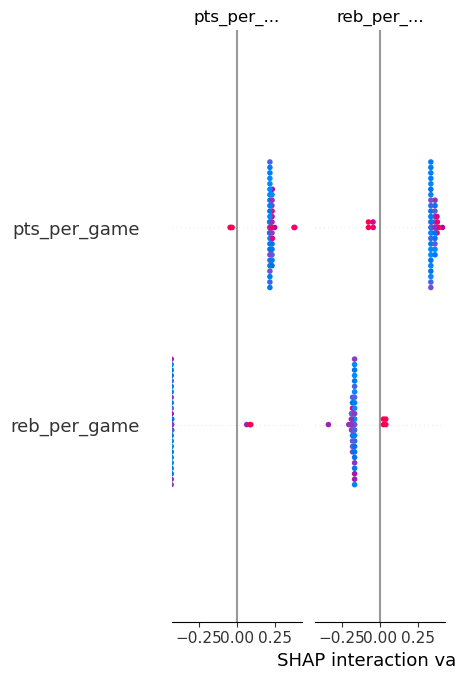


=== Running Bayesian Hyperparameter Tuning ===
Unique training labels: [0 1]
Unique test labels: [0 1]
SMOTENC will treat the following column indices as categorical: [0, 1, 2]
Before resampling, class distribution:
 MVP
0    1327
1       8
Name: count, dtype: int64
After resampling, class distribution:
 MVP
0    1327
1     398
Name: count, dtype: int64
Best Hyperparameters Found:
OrderedDict([('classifier__max_depth', 5), ('classifier__min_samples_split', 10), ('classifier__n_estimators', 500)])

Tuned Model Evaluation Metrics:
Accuracy: 0.988
Precision: 0.333
Recall: 1.000
F1 Score: 0.500

Classification Report:
              precision    recall  f1-score   support

     Not MVP       1.00      0.99      0.99       170
         MVP       0.33      1.00      0.50         1

    accuracy                           0.99       171
   macro avg       0.67      0.99      0.75       171
weighted avg       1.00      0.99      0.99       171


🏆 Predicted MVP for 2024 Season 🏆
Player: A'ja Wi

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import shap
from skopt import BayesSearchCV
from sklearn.preprocessing import FunctionTransformer
# Import SmartExplainer from Shapash (see https://github.com/MAIF/shapash)
from shapash.explainer.smart_explainer import SmartExplainer

from imblearn.over_sampling import SMOTENC  # New import for SMOTENC
from sklearn.preprocessing import RobustScaler
from skopt.space import Integer, Categorical
from sklearn.model_selection import RepeatedStratifiedKFold

class TeamWinClassifier:
    def __init__(self, classifier=None, random_state=42):
        """
        Initialize the TeamWinClassifier with a default or provided classifier.
        Now uses a cost-sensitive RandomForestClassifier.
        """
        self.classifier = classifier or RandomForestClassifier(
            class_weight={0: 1, 1: 10},  # apply a 10:1 penalty for misclassifying MVPs
            max_depth=30,
            min_samples_leaf=3,
            n_estimators=500,
            random_state=random_state
        )
        self.random_state = random_state
        self.preprocessor = None
        self.pipeline = None
        self.smart_explainer = None  # For shapash

    @staticmethod
    def validate_training_data(y):
        unique_classes = np.unique(y)
        if len(unique_classes) < 2:
            raise ValueError("Insufficient class variety for training. At least two classes are required.")

    def resample_training_data(self, X, y, categorical_features):
        cat_indices = [X.columns.get_loc(col) for col in categorical_features if col in X.columns]
        print("SMOTENC will treat the following column indices as categorical:", cat_indices)
        print("Before resampling, class distribution:\n", y.value_counts())
        smote_nc = SMOTENC(categorical_features=cat_indices, k_neighbors=3,
                           sampling_strategy=0.3, random_state=self.random_state)
        X_res, y_res = smote_nc.fit_resample(X, y)
        print("After resampling, class distribution:\n", pd.Series(y_res).value_counts())
        return X_res, y_res

    def _build_preprocessor(self, numeric_features, categorical_features):
        numeric_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())  # use RobustScaler for better normalization
        ])
        categorical_transformer = Pipeline([
            ('to_str', FunctionTransformer(lambda X: X.astype(str))),
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        self.preprocessor = ColumnTransformer([
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    def build_pipeline(self, numeric_features, categorical_features):
        # Filter out unique identifier columns from the categorical features
        unique_id_columns = ['player_id', 'team_id']
        filtered_categorical_features = [feat for feat in categorical_features if feat not in unique_id_columns]
        
        # Build the preprocessor using the filtered categorical features
        self._build_preprocessor(numeric_features, filtered_categorical_features)
        
        # Build the pipeline with preprocessing and the classifier
        self.pipeline = Pipeline([
            ('preprocess', self.preprocessor),
            ('classifier', self.classifier)
        ])


    def train(self, df, target_col, numeric_features, categorical_features, split_column, split_time, test_size=0.2):

        # Temporal split: Train on 2016-2023, Test on 2024
        train_data = df[df[split_column] < split_time]
        test_data = df[df[split_column] == split_time]
        
        # Separate features and target
        X_train = train_data.drop(columns=[target_col])
        y_train = train_data[target_col]
        X_test = test_data.drop(columns=[target_col])
        y_test = test_data[target_col]        
        print("Unique training labels:", np.unique(y_train))
        print("Unique test labels:", np.unique(y_test))
        # Resample training data
        X_train, y_train = self.resample_training_data(X_train, y_train, categorical_features)
        self.build_pipeline(numeric_features, categorical_features)
        self.pipeline.fit(X_train, y_train)
        y_pred = self.pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        print("Standard Training Evaluation Metrics:")
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision: {prec:.3f}")
        print(f"Recall: {rec:.3f}")
        print(f"F1 Score: {f1:.3f}")
        print("\nClassification Report:")
        if len(np.unique(y_test)) == 1:
            print(classification_report(y_test, y_pred))
        else:
            print(classification_report(y_test, y_pred, target_names=['Not MVP', 'MVP']))
        return X_test, y_test



    def tune_and_train(self, df, target_col, numeric_features, categorical_features,
                    split_column, split_time, search_spaces, n_iter=25, cv=3, test_size=0.2):
        """
        Performs Bayesian hyperparameter optimization using BayesSearchCV,
        resamples the training data using SMOTENC, then fits the best estimator on training data and evaluates it.
        """
        # Temporal split: Train on 2016-2023, Test on 2024
        train_data = df[df[split_column] < split_time]
        test_data = df[df[split_column] == split_time]
        
        # Separate features and target
        X_train = train_data.drop(columns=[target_col])
        y_train = train_data[target_col]
        X_test = test_data.drop(columns=[target_col])
        y_test = test_data[target_col]        
        print("Unique training labels:", np.unique(y_train))
        print("Unique test labels:", np.unique(y_test))
        
        # Validate that training data contains at least two classes
        self.validate_training_data(y_train)
        
        # --- New Step: Resample training data using SMOTENC ---
        X_train, y_train = self.resample_training_data(X_train, y_train, categorical_features)
        
        self.build_pipeline(numeric_features, categorical_features)
        
        opt = BayesSearchCV(
            self.pipeline,
            search_spaces,
            n_iter=n_iter,
            cv=cv,
            scoring='accuracy',  # Consider using a different metric (e.g., roc_auc) for imbalanced data.
            random_state=self.random_state,
            n_jobs=-1
        )
        opt.fit(X_train, y_train)
        
        self.pipeline = opt.best_estimator_
        print("Best Hyperparameters Found:")
        print(opt.best_params_)
        
        y_pred = self.pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        print("\nTuned Model Evaluation Metrics:")
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision: {prec:.3f}")
        print(f"Recall: {rec:.3f}")
        print(f"F1 Score: {f1:.3f}")
        print("\nClassification Report:")
        
        # Here, we assume 0 is 'Not MVP' and 1 is 'MVP'
        unique_classes = np.unique(y_test)
        if len(unique_classes) == 1:
            print(classification_report(y_test, y_pred))
        else:
            print(classification_report(y_test, y_pred, target_names=['Not MVP', 'MVP']))
        
        return X_test, y_test

    def predict(self, new_data):
        """
        Predict win/loss labels for new data.
        """
        return self.pipeline.predict(new_data)

    def predict_proba(self, new_data):
        """
        Return prediction probabilities for new data.
        """
        return self.pipeline.predict_proba(new_data)

    @staticmethod
    def get_preprocessor_feature_names(preprocessor, numeric_features, categorical_features):
        """
        Extract output feature names from a ColumnTransformer that has a numeric and a categorical pipeline.
        Assumes that the final step in the categorical pipeline is a OneHotEncoder.
        """
        names = []
        # Numeric features remain unchanged.
        names.extend(numeric_features)
        # Get the categorical feature names from the OneHotEncoder step.
        cat_pipeline = preprocessor.named_transformers_['cat']
        onehot = cat_pipeline.named_steps['onehot']
        cat_names = onehot.get_feature_names_out(categorical_features)
        names.extend(cat_names)
        return names


    def explain_model(self, X_sample):
        """
        Generates and displays a SHAP summary plot for the classifier using SHAP.
        """
        classifier = self.pipeline.named_steps['classifier']
        X_processed = self.preprocessor.transform(X_sample)
        if hasattr(X_processed, "toarray"):
            X_processed = X_processed.toarray()
        
        # Extract feature names using the helper method
        feature_names = self.get_preprocessor_feature_names(
            self.preprocessor, 
            numeric_features=['pts_per_game', 'reb_per_game', 'ast_per_game', 'min_per_game', 'PIE'],
            categorical_features=['nba_season']
        )
        
        # Convert feature_names to a numpy array to support advanced indexing
        feature_names = np.array(feature_names)
        
        explainer = shap.TreeExplainer(classifier)
        shap_values = explainer.shap_values(X_processed)
        shap.summary_plot(shap_values, X_processed, feature_names=feature_names)

    def explain_model_shapash(self, X_sample, feature_names=None, title_story="Model Dashboard", port=None):
        """
        Generates an interactive explanation dashboard using Shapash.
        
        Parameters:
            X_sample (DataFrame): The dataset on which to compile the explainer.
            feature_names (list, optional): Custom feature names. Defaults to those from the preprocessor.
            title_story (str, optional): Title to display on the dashboard. Defaults to "Model Dashboard".
            port (int, optional): Port number for the web dashboard. If not provided, the default port is used.
        
        This function creates a SmartExplainer with the current pipeline and preprocessor,
        compiles it using X_sample and feature_names, and then launches the web app dashboard.
        """
        # Transform X_sample using the preprocessor (for safety)
        X_processed = self.preprocessor.transform(X_sample)
        if hasattr(X_processed, "toarray"):
            X_processed = X_processed.toarray()
        if feature_names is None:
            feature_names = self.preprocessor.get_feature_names_out()
        
        # Initialize SmartExplainer with model and preprocessor
        self.smart_explainer = SmartExplainer(model=self.pipeline, preprocessing=self.preprocessor)
        # Compile the explainer with the input data and feature names
        self.smart_explainer.compile(x=X_sample, feature_names=feature_names)
        
        # Launch the web dashboard with the given title and port (if provided)
        if port:
            app = self.smart_explainer.run_app(title_story=title_story, port=port)
        else:
            app = self.smart_explainer.run_app(title_story=title_story)
        
        return app  # Return the app instance so that the user can call .kill() if needed

    def generate_shapash_report(self, output_file, project_info_file=None, x_train=None, y_train=None, y_test=None, title_story="Model Report", title_description="Detailed Model Audit Report", metrics=None):
        """
        Generates a standalone HTML report of the model using Shapash's report functionality.
        
        Parameters:
            output_file (str): Path to save the generated report.
            project_info_file (str, optional): Path to a YAML file containing project information.
            x_train (DataFrame, optional): Training data used for report generation.
            y_train (Series, optional): Training targets.
            y_test (Series, optional): Test targets.
            title_story (str, optional): Title of the report.
            title_description (str, optional): Description text for the report.
            metrics (list, optional): List of metrics dictionaries to include in the report.
        
        Returns:
            None. The report is generated and saved to the specified output file.
        
        Note: Ensure that the SmartExplainer has been compiled prior to calling this method.
        If it has not been compiled yet, the method will compile it using the provided x_train.
        """
        # If the smart_explainer is not already initialized, create and compile it using x_train.
        if self.smart_explainer is None:
            if x_train is None:
                raise ValueError("x_train must be provided if the SmartExplainer has not been compiled yet.")
            # Use the preprocessor's feature names if not provided
            feature_names = self.preprocessor.get_feature_names_out()
            self.smart_explainer = SmartExplainer(model=self.pipeline, preprocessing=self.preprocessor)
            self.smart_explainer.compile(x=x_train, feature_names=feature_names)
        
        # Call the generate_report method from SmartExplainer with the provided parameters.
        self.smart_explainer.generate_report(
            output_file=output_file,
            project_info_file=project_info_file,
            x_train=x_train,
            y_train=y_train,
            y_test=y_test,
            title_story=title_story,
            title_description=title_description,
            metrics=metrics
        )

    


def generate_mvp_prediction_summary(master_data, model, numeric_features, categorical_features=None):
    """
    Generates a comprehensive summary of MVP predictions for the 2024 season.
    
    Parameters:
        master_data (DataFrame): The complete dataset with all player records.
        model: The trained pipeline model (which includes preprocessing).
        numeric_features (list): List of numeric feature names used in the model.
        categorical_features (list, optional): List of categorical feature names used in the model.
    
    Returns:
        DataFrame: A sorted dataframe of players with their MVP prediction scores and key stats.
    """
    # Filter for the most recent season (2024)
    data_2024 = master_data[master_data['nba_season'] == 2024].copy()
    
    # If a player played for multiple teams, keep record with most minutes
    data_2024 = data_2024.sort_values('player_mp', ascending=False).groupby('player_id').first().reset_index()
    
    # Prepare features for prediction
    X_features = []
    if numeric_features:
        X_features.extend(numeric_features)
    if categorical_features:
        X_features.extend(categorical_features)
    
    X_2024 = data_2024[X_features]
    
    # Use the full pipeline (model) to predict; it will handle preprocessing.
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_2024)
        data_2024['mvp_score'] = probas[:, 1]  # probability of MVP (class 1)
    else:
        data_2024['mvp_score'] = model.predict(X_2024)
    
    key_stats = [
        'player_id', 'player_name', 'team_id', 'team_code', 
        'mvp_score', 'PIE', 'pts_per_game', 'reb_per_game', 
        'ast_per_game', 'min_per_game', 'fg_pct', 'ft_pct', 
        'win_pct', 'wins', 'losses'
    ]
    
    existing_cols = [col for col in key_stats if col in data_2024.columns]
    mvp_summary = data_2024[existing_cols].copy()
    
    mvp_summary = mvp_summary.sort_values('mvp_score', ascending=False).reset_index(drop=True)
    
    print("\n🏆 Predicted MVP for 2024 Season 🏆")
    print("===================================")
    top_mvp = mvp_summary.iloc[0]
    print(f"Player: {top_mvp['player_name']} (ID: {top_mvp['player_id']})")
    print(f"Team: {top_mvp.get('team_code', 'N/A')} (ID: {top_mvp['team_id']})")
    print(f"MVP Score: {top_mvp['mvp_score']:.4f}")
    print("\nKey Performance Metrics:")
    for stat in ['PIE', 'pts_per_game', 'reb_per_game', 'ast_per_game', 'min_per_game', 'fg_pct', 'win_pct']:
        if stat in top_mvp:
            print(f"- {stat}: {top_mvp[stat]:.2f}")
    
    return mvp_summary

def prepare_team_prediction_data(master_model):
    """
    Prepare team prediction data by computing derived features and aggregating player data.
    """
    # --- Step 1: Compute per-game statistics ---
    master_model['pts_per_game'] = master_model['pts'] / master_model['player_gp']
    master_model['ast_per_game'] = master_model['ast'] / master_model['player_gp']
    master_model['min_per_game'] = master_model['player_mp'] / master_model['player_gp']
    master_model['reb_per_game'] = (master_model['drb'] + master_model['orb']) / master_model['player_gp']

    # --- Step 2: Compute shooting percentages with safeguards ---
    master_model['fg_pct'] = master_model.apply(
        lambda row: row['fgm'] / row['fga'] if row['fga'] > 0 else 0, axis=1)
    master_model['ft_pct'] = master_model.apply(
        lambda row: row['ftm'] / row['fta'] if row['fta'] > 0 else 0, axis=1)

    # --- Step 3: Create MVP flag based on mvp_rank ---
    print("\nChecking MVP voting data:")
    print("mvp_rank values:", master_model['mvp_rank'].unique())
    print("mvp_rank value counts:", master_model['mvp_rank'].value_counts())
    
    # Create MVP column (1 for rank 1, 0 for others)
    master_model['MVP'] = (master_model['mvp_rank'] == 1).astype(int)
    
    # Verify MVP creation
    print("\nMVP distribution after creation:")
    print(master_model['MVP'].value_counts())
    
    # Print MVP winners for verification
    mvp_winners = master_model[master_model['MVP'] == 1][['nba_season', 'player_name', 'mvp_rank']]
    print("\nMVP Winners by Season:")
    print(mvp_winners.sort_values('nba_season'))

    # --- Step 4: Define aggregation dictionary and group data ---
    agg_dict = {
        'pts_per_game': 'mean',
        'ast_per_game': 'mean',
        'fg_pct': 'mean',
        'ft_pct': 'mean',
        'min_per_game': 'mean',
        'reb_per_game': 'mean',
        'PIE': 'mean',
        'wins': 'max',
        'losses': 'max',
        'MVP': 'max'
    }

    # Group by team_id, player_id, and nba_season
    team_data = master_model.groupby(['team_id', 'player_id', 'nba_season']).agg(agg_dict).reset_index()

    # --- Step 5: Compute win percentage ---
    team_data['win_pct'] = team_data['wins'] / (team_data['wins'] + team_data['losses'])

    # Verify final MVP distribution
    print("\nFinal MVP distribution in team_data:")
    print(team_data['MVP'].value_counts())

    return team_data


# ================================
# Main Module for Testing
# ================================
if __name__ == '__main__':
    np.random.seed(42)
    
    master_model = load_explore_group_data()
    print("\nInitial data check:")
    print("Columns in master_model:", master_model.columns.tolist())
    print("\nMVP voting columns present:")
    mvp_cols = [col for col in master_model.columns if 'mvp' in col.lower()]
    print(mvp_cols)
    
    team_data = prepare_team_prediction_data(master_model)
    
    # Additional verification of the prepared data
    print("\nVerifying prepared data:")
    print("Number of MVP=1 records:", len(team_data[team_data['MVP'] == 1]))
    print("Number of total records:", len(team_data))
    
    if len(team_data[team_data['MVP'] == 1]) == 0:
        raise ValueError("No MVP records found in the prepared data!")
    

    numeric_features = ['pts_per_game', 'reb_per_game', 'ast_per_game', 'min_per_game', 'PIE']
    categorical_features = ['team_id', 'player_id', 'nba_season']
    target_col = 'MVP'
    

    print("\nColumns in team_data:")
    print(team_data.columns.tolist())
    print("\nUnique values in each column:")
    for col in team_data.columns:
        print(f"\n{col}:")
        print(team_data[col].unique())

    twc = TeamWinClassifier(random_state=42)
    split_column = 'nba_season'
    split_time = 2024
    print("=== Running Standard Training ===")
    X_test_std, y_test_std = twc.train(team_data, target_col, numeric_features, categorical_features, split_column, split_time)
    predictions = twc.predict(X_test_std)
    print("\nSample Predictions (Standard Training):", predictions[:5])
    
    
    print("\nGenerating SHAP summary plot for standard model...")
    twc.explain_model(X_test_std.head(50))
    
    print("\n=== Running Bayesian Hyperparameter Tuning ===")
    search_spaces = {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }
    X_test_tuned, y_test_tuned = twc.tune_and_train(team_data, target_col, numeric_features, categorical_features,
                   split_column, split_time, search_spaces, n_iter=20, cv=3)

    predictions_tuned = twc.predict(X_test_tuned)


    # Generate MVP prediction summary using the full pipeline (which includes preprocessing)
    mvp_predictions = generate_mvp_prediction_summary(
        master_model, 
        twc.pipeline,  # Pass the full pipeline for proper preprocessing
        numeric_features,
        categorical_features
    )
    
    print("\nTop 5 MVP Candidates for 2024:")
    print(mvp_predictions.head(5).to_string())
    mvp_predictions.to_csv('2024_mvp_predictions.csv', index=False)


